<font size=7> Phase Lock Heatmap - chip 21769

# Setup

In [157]:
from human_hip import spike_data
import numpy as np
from human_hip.spike_data import *
import pickle

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [158]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")

with open( "2023-12-11-e-Hc120523_aav9hckcr1_chip21769_theta_spike_locking_s.pkl", 'rb') as file:
    data = pickle.load(file)
angles = data["mean_angle"]
pvals = data["rayleigh_p"]

In [159]:
neuron_x = []
neuron_y = []
neuron_xy = []
for key,val in sd.neuron_data[0].items():
    neuron_x.append( val["position"][0] )
    neuron_y.append( val["position"][1] )
    neuron_xy.append( val["position"] )
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

/tmp/ipykernel_2334/283558322.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for key,val in sd.neuron_data[0].items():


(array([109.,  14.,  12.,   5.,  10.,   6.,   7.,   6.,   4.,   5.]),
 array([3.36837593e-42, 9.93817780e-02, 1.98763556e-01, 2.98145334e-01,
        3.97527112e-01, 4.96908890e-01, 5.96290668e-01, 6.95672446e-01,
        7.95054224e-01, 8.94436002e-01, 9.93817780e-01]),
 <BarContainer object of 10 artists>)

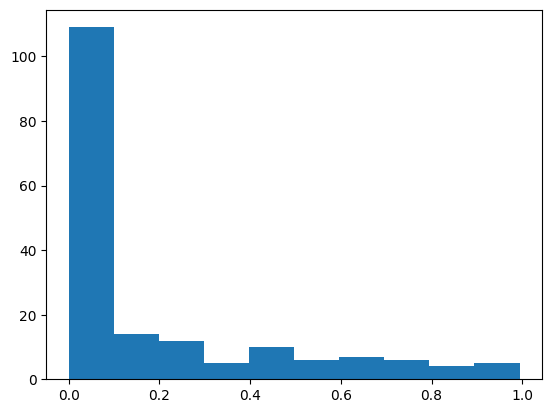

In [160]:
plt.hist(pvals)

In [171]:
pval=.01

sig_x = neuron_x[pvals<pval]
sig_y = neuron_y[pvals<pval]
sig_angles =angles[pvals<pval]
sig_xy = np.array( [ [sig_x[i], sig_y[i]] for i in range(len(sig_x)) ] )

In [172]:
def rotate_angles( angles, add=-2.5):
    adjusted_angles = []
    for num in angles:
        num += add         # Add 1 to the number
        adjusted_num = ((num + math.pi) % (2 * math.pi)) - math.pi  # modulo operation to wrap within -pi to pi
        adjusted_angles.append(adjusted_num)
    return adjusted_angles

In [173]:
sig_angles2 = rotate_angles(sig_angles, 1.5)

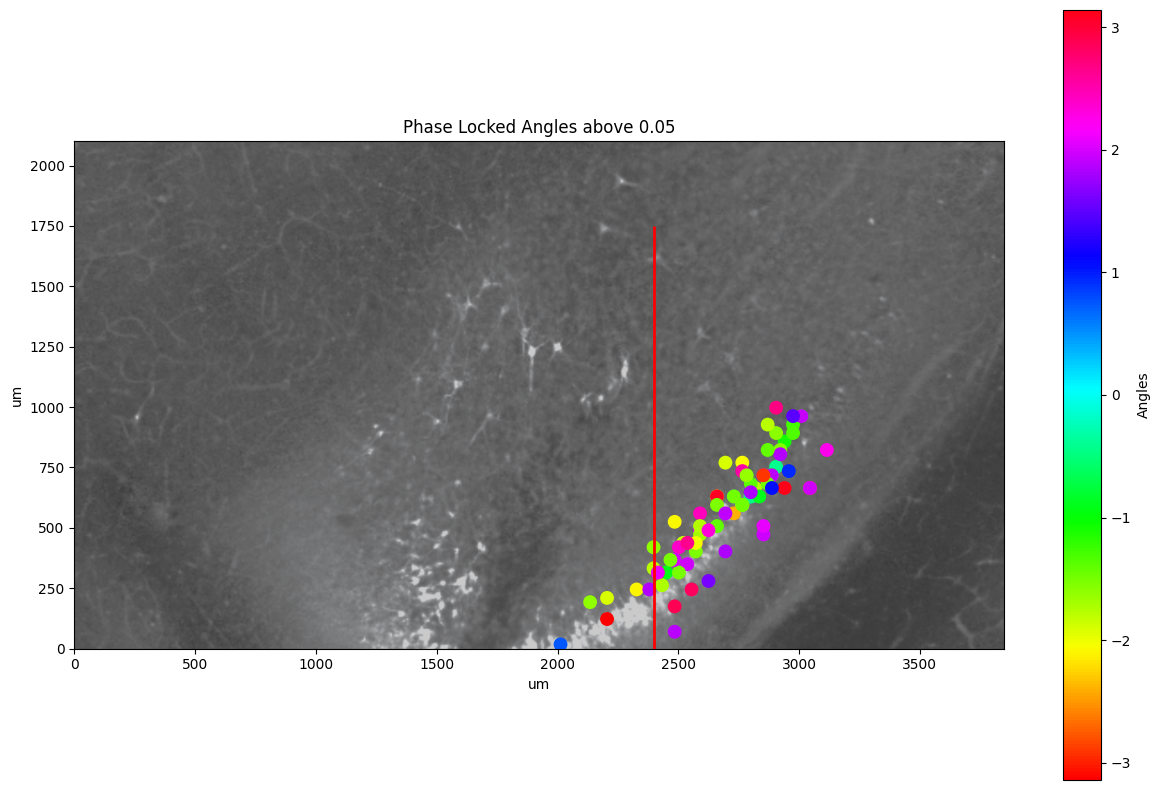

In [174]:
plt.figure(figsize=(15,10))  # Set image size to roughly the shape of the MEA
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")  # Load in image
plt.imshow(img, extent=[0, 3850, 0, 2100])  # Plot image, have it correspond to electrode dimensions

# Scatter plot with colors based on `angles` using the `Spectral` colormap
plt.scatter( sig_x, sig_y, c=sig_angles2, cmap='hsv', alpha=1, s=80, vmin=-3.1416, vmax=3.1416)

#plt.xlim(0, 1750)  # Set axis limits to that of the MEA
#plt.ylim(0, 1750)
plt.xlabel('um')  # add axises and title
plt.ylabel('um')
plt.title("Phase Locked Angles above 0.05")
plt.colorbar(label='Angles')  # Add a colorbar to show the mapping of colors to angles


# plt.vlines( 920, 0, 1750, color="red", linewidth=2 )
# plt.hlines( 900, 0, 1750, color="red", linewidth=2 )
# plt.hlines( 1120, 0, 1750, color="orange", linewidth=2 )
# plt.vlines( 955, 0, 1750, color="orange", linewidth=2 )
plt.vlines( 2400, 0, 1750, color="red", linewidth=2 )

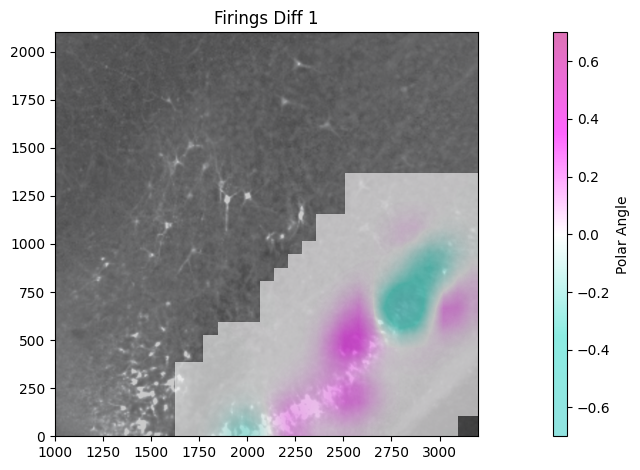

In [188]:
from matplotlib.colors import LinearSegmentedColormap
#cmap =   #LinearSegmentedColormap.from_list("my_cmap", ['white', 'red' ])
cmap = LinearSegmentedColormap.from_list("my_cmap", ['mediumturquoise', 'turquoise', "white" , 'magenta' , 'mediumvioletred' ])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter

img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png") 

fr = np.abs(sig_angles2) - np.mean(np.abs(sig_angles2))

mean1 = np.mean(fr)
std1 = np.std(fr)


# Determine global min and max for the colorbar
# global_min = np.min(fr) #np.mean(fr)-2*np.std(fr) 
# global_max = np.max(fr) #np.mean(fr)+2*np.std(fr) 
# global_min = np.mean(fr)-np.std(fr) 
# global_max = np.mean(fr)+np.std(fr) 


# Normalize both datasets based on the global min and max
#norm = plt.Normalize( vmin= np.mean(fr)-np.std(fr), vmax= np.mean(fr)+np.std(fr) )
norm = plt.Normalize( vmin= -.7, vmax= .7)
#plt.figure(figsize=(1, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.imshow(img, extent=[0, 3850, 0, 2100])
#plt.vlines( 2700, 0, 2000, color="red", linewidth=2 )
#plt.vlines( 2150, 0, 2000, color="red", linewidth=2 )

heatmap1, xedges1, yedges1 = np.histogram2d(sig_x, sig_y, bins=30, weights=fr*1.2, range=[[1000, 3200], [0,2100]])
heatmap1 = gaussian_filter(heatmap1, sigma=1.2)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = plt.imshow(heatmap1.T, extent=[1000, 3200, 0,2100], origin='lower', cmap=cmap, norm=norm, alpha=0.6, interpolation='bilinear') #"PuOr"
plt.title('Firings Diff 1')

#cbar_ax = plt.subplot(gs[2])
#cbar = plt.colorbar(im2, cax=cbar_ax)
#cbar.set_label('Firing Differences')

cbar_ax = plt.subplot(gs[0, 2])  # Add the colorbar to the third column in the grid
cbar = plt.colorbar(im1, cax=cbar_ax)  # Create the colorbar based on the heatmap
cbar.set_label('Polar Angle')

plt.tight_layout()

(0.0, 2100.0)

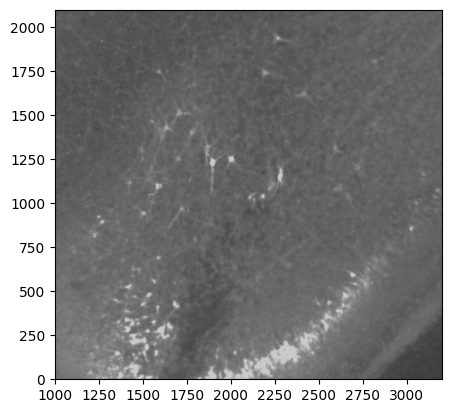

In [176]:

img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png") 
plt.imshow(img, extent=[0, 3850, 0, 2100])
plt.xlim(1000, 3200)
plt.ylim(0, 2100)





In [177]:
np.logical_not

<ufunc 'logical_not'>

In [178]:
group1 = np.array(sig_angles2)[np.logical_and(sig_x<2700, sig_x>2150)] #np.array(sig_angles2)[ sig_x<2700  ]
group2 = np.array(sig_angles2)[np.logical_not( np.logical_and(sig_x<2700, sig_x>2150) )] #np.array(sig_angles2)[ sig_x>2700 ]

#group1 = np.array(sig_angles2)[ sig_x<2700  ]
#group2 = np.array(sig_angles2)[ sig_x>2700  ]

(array([ 2.,  6., 11.,  1.,  0.,  0.,  0.,  3., 10.,  5.]),
 array([-3.13194815, -2.50981659, -1.88768503, -1.26555347, -0.64342191,
        -0.02129035,  0.60084121,  1.22297277,  1.84510433,  2.4672359 ,
         3.08936746]),
 <BarContainer object of 10 artists>)

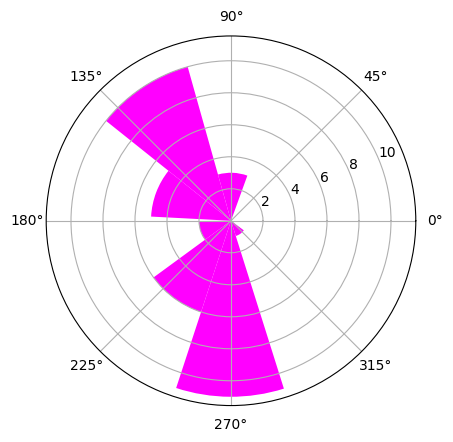

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(group1,  density=False, color="magenta") #bins=4/
#ax.set_yticks([1, 2])
#ax.set_yticklabels([1, 2, 3, 4], fontsize=14)

(array([16., 12.,  6., 15.]),
 array([-2.89849048, -1.3936039 ,  0.11128267,  1.61616925,  3.12105583]),
 <BarContainer object of 4 artists>)

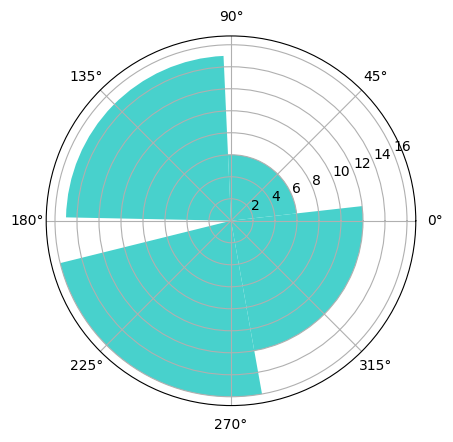

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(group2, bins=4, density=False, color="mediumturquoise")
#ax.set_yticks([1, 2, 3, 4])
#ax.set_yticklabels([1, 2, 3, 4], fontsize=14)